
 Import necessary libraries

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras, data
from keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
import os, cv2, time
from functools import partial
from albumentations import (Compose, HorizontalFlip, RandomRotate90, MotionBlur)
from keras.backend import clear_session

from sklearn.model_selection import KFold
#import optuna
#import optuna.visualization as optvis

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.layers import Activation, Dropout, Flatten, Dense


from PIL import Image


In [ ]:
batch_size = 16
img_height = 224
img_width = 224
SIZE = 224
num_channels = 3 # RGB
#labels = ['No_Billboard', 'Billboard']
INPUT_SHAPE = (img_height, img_width)
SHAPE = (img_height, img_width, num_channels)

data_dir_path = "/python_programming/FYP_2022/billboard_dataset/output1/"

dataset = []  #Many ways to handle data, you can use pandas.
label = []  #Place holders to define add labels. We will add 0 to all no_billboards  images and 1 to billboards.


## LOADING IN THE DATA

In [ ]:
no_bilboard_images = os.listdir(data_dir_path + 'No_Billboard/')
for i, image_name in enumerate(no_bilboard_images):    #Remember enumerate method adds a counter and returns the enumerate object

    if (image_name.split('.')[1] == 'jpg'):
        image = cv2.imread(data_dir_path + 'No_Billboard/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image))
        label.append(0)

#Iterate through all images in Uninfected folder, resize to 64 x 64
#Then save into the same numpy array 'dataset' but with label 1
billboard_images = os.listdir(data_dir_path + 'Billboard/')
for i, image_name in enumerate(billboard_images):
    if (image_name.split('.')[1] == 'jpg'):
        image = cv2.imread(data_dir_path + 'Billboard/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image))
        label.append(1)

dataset = np.array(dataset)
label = np.array(label)

(3020, 224, 224, 3)
(3020,)
Label for this image is:  0


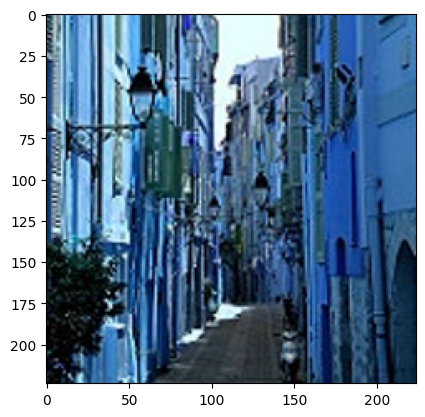

In [ ]:
print(dataset.shape)
print(label.shape)


#Sanity check, view random few mages
import random
import numpy as np
image_number = random.randint(0, len(dataset)-1)
plt.imshow(np.reshape(dataset[image_number], (224, 224, 3)))
print("Label for this image is: ", label[image_number])

In [ ]:
from sklearn.model_selection import train_test_split
#from keras.utils import to_categorical

X_train, X_test, y_train, y_test = train_test_split(dataset, label, test_size = 0.20, random_state = 0)

#from keras.utils import normalize
#X_train = normalize(X_train, axis=1)
#X_test = normalize(X_test, axis=1)
X_train = X_train / 255.
X_test = X_test / 255.

#Merge inputs and targets
inputs = np.concatenate((X_train, X_test), axis=0)
targets = np.concatenate((y_train, y_test), axis=0) #labels

# Define per-fold score containers <-- these are new
acc_per_fold = []
loss_per_fold = []

ALOS datasetADNET_modelkfold

In [ ]:
path = f"/python_programming/FYP_2022/Models/model/"
new_model = tf.keras.models.load_model(os.path.join(path, 'ALOS_ADNET_modelkfold.h5'))

In [ ]:
predictions = new_model.predict(X_test)
actual_ylabel = y_test
#print("The prediction for this image is: ", predictions)
print("The actual label for this image is: ", actual_ylabel)

y_hat = np.argmax(predictions, axis = 1) # We take the highest probability
print('prediction label:', y_hat)

#Compare the predictions and labels and get the accuracy
accuracy = np.mean(np.equal(actual_ylabel, y_hat))
print(f"Accuracy: {accuracy:.2f}")



19/19 [==============================] - 1s 37ms/step
The actual label for this image is:  [0 0 1 1 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 0 0 1 1 0 0 1 0 0
 1 0 0 1 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 1 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 0
 1 0 0 0 0 0 0 1 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 1 0 1 0 1 0 0 1 0 0 0 1 0 1
 1 1 1 0 1 0 0 1 1 0 1 0 1 1 1 0 0 0 1 1 1 0 0 1 1 1 0 1 1 1 1 0 0 0 0 0 1
 0 0 1 1 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 1 0 1 1 1 0 1 0 0 1 0 0 1 0 0
 1 0 0 1 1 1 0 1 1 1 1 1 0 0 1 1 1 0 0 1 0 1 1 0 1 0 1 1 0 1 0 0 1 1 0 1 0
 1 0 1 0 1 0 1 1 0 0 0 0 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0
 1 1 0 1 0 0 1 1 1 1 0 1 1 0 0 1 1 0 0 0 0 1 0 1 0 0 1 1 1 1 1 1 1 0 1 0 1
 0 0 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1 1 0
 1 0 0 0 1 0 0 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 1 1 1 1
 1 1 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 1 0 0 0 1 0 1 0 1 1 0 1 0 0
 0 0 1 1 1 1 1 1 0 1 1 0 0 1 1 0 0 0 0 0 0 1 1 1 0 1 1 1 1 0 0 0 1 0 0 1 1
 1 0 0 0 

In [ ]:
test= 0
for i in range(len(X_test)):
   #textx_file_name = os.path.basename(X_test[i])
   #print('text x:', textx_file_name)

   #if y_hat[i] > 0.5:
  plt.figure()
  plt.imshow(X_test[i][:,:,::-1])
  plt.title("True label: {} \n Predicted label: {}".format(actual_ylabel[i], y_hat[i]))
  plt.axis('off')
  print('Predicted class belongs to billboard class')
    #image_bgr = cv2.cvtColor(X_test[i], cv2.COLOR_RGB2BGR)

    # Scale the pixel values to the range [0, 255]
  scaled_image = (X_test[i] * 255).astype('uint8')
  rgb_image = cv2.cvtColor(scaled_image, cv2.COLOR_BGR2RGB)
  resized_image = cv2.resize(scaled_image, (224, 224))

  #cv2.imwrite(f'/python_programming/FYP_2022/testresult/newdataset/adnet/{i}.jpg',resized_image[i])
  plt.savefig('/python_programming/FYP_2022/testresult/alosdataset/adnet/' +str(test)+ '', bbox_inches = 'tight', pad_inches = 0)
  test = test +1
  plt.show()

   #else:
   #print('Predicted class belongs to no billboad class')



Output hidden; open in https://colab.research.google.com to view.

In [ ]:
_, acc = new_model.evaluate(X_test, y_test)
print("Accuracy = ", (acc * 100.0), "%")


19/19 [==============================] - 1s 21ms/step - loss: 0.3096 - accuracy: 0.9172
Accuracy =  91.7218565940857 %


In [ ]:
# Compare y_hat to y_val
misclassified = []
label_comparison =  actual_ylabel == y_hat
misclassified = np.where(label_comparison == False)[0]  # Get the indices of misclassified images
print('misclassified indices:',misclassified)
print('no. of misclassification:', len(misclassified))
plt.figure(figsize=(25, 25))
for i, index in enumerate(misclassified):
    ax =plt.subplot(9, 7, i+1)
    plt.imshow(X_test[index])
    plt.title("True label: {} \n Predicted label: {}".format(actual_ylabel[index], y_hat[index]))
    plt.axis('off')

Output hidden; open in https://colab.research.google.com to view.

ALOS datasetVGG19ADNET_modelkfold

In [ ]:
path = f"/python_programming/FYP_2022/Models/model/"

new_model_vgg = tf.keras.models.load_model(os.path.join(path, 'ALOS_VGG19ADNET_modelkfold.h5'))

In [ ]:
predictions = new_model_vgg.predict(X_test)
actual_ylabel = y_test
#print("The prediction for this image is: ", predictions)
print("The actual label for this image is: ", actual_ylabel)

y_hat = np.argmax(predictions, axis = 1) # We take the highest probability
print('prediction label:', y_hat)

#Compare the predictions and labels and get the accuracy
accuracy = np.mean(np.equal(actual_ylabel, y_hat))
print(f"Accuracy: {accuracy:.2f}")


19/19 [==============================] - 10s 311ms/step
The actual label for this image is:  [0 0 1 1 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 0 0 1 1 0 0 1 0 0
 1 0 0 1 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 1 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 0
 1 0 0 0 0 0 0 1 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 1 0 1 0 1 0 0 1 0 0 0 1 0 1
 1 1 1 0 1 0 0 1 1 0 1 0 1 1 1 0 0 0 1 1 1 0 0 1 1 1 0 1 1 1 1 0 0 0 0 0 1
 0 0 1 1 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 1 0 1 1 1 0 1 0 0 1 0 0 1 0 0
 1 0 0 1 1 1 0 1 1 1 1 1 0 0 1 1 1 0 0 1 0 1 1 0 1 0 1 1 0 1 0 0 1 1 0 1 0
 1 0 1 0 1 0 1 1 0 0 0 0 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0
 1 1 0 1 0 0 1 1 1 1 0 1 1 0 0 1 1 0 0 0 0 1 0 1 0 0 1 1 1 1 1 1 1 0 1 0 1
 0 0 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1 1 0
 1 0 0 0 1 0 0 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 1 1 1 1
 1 1 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 1 0 0 0 1 0 1 0 1 1 0 1 0 0
 0 0 1 1 1 1 1 1 0 1 1 0 0 1 1 0 0 0 0 0 0 1 1 1 0 1 1 1 1 0 0 0 1 0 0 1 1
 1 0 0 

In [ ]:
test= 0
for i in range(len(X_test)):

  plt.figure()
  plt.imshow(X_test[i][:,:,::-1])
  plt.title("True label: {} \n Predicted label: {}".format(actual_ylabel[i], y_hat[i]))
  plt.axis('off')
  print('Predicted class belongs to billboard class')
  #image_bgr = cv2.cvtColor(X_test[i], cv2.COLOR_RGB2BGR)

  # Scale the pixel values to the range [0, 255]
  scaled_image = (X_test[i] * 255).astype('uint8')
  rgb_image = cv2.cvtColor(scaled_image, cv2.COLOR_BGR2RGB)
  resized_image = cv2.resize(scaled_image, (224, 224))

  plt.savefig('/python_programming/FYP_2022/testresult/alosdataset/vggnet/' +str(test)+ '', bbox_inches = 'tight', pad_inches = 0)
  test = test +1
  plt.show()


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
_, acc = new_model_vgg.evaluate(X_test, y_test)
print("Accuracy = ", (acc * 100.0), "%")

19/19 [==============================] - 8s 405ms/step - loss: 0.0823 - accuracy: 0.9868
Accuracy =  98.67549538612366 %


misclassified indices: [203 219 264 271 492 556 589 595]
no. of misclassification: 8


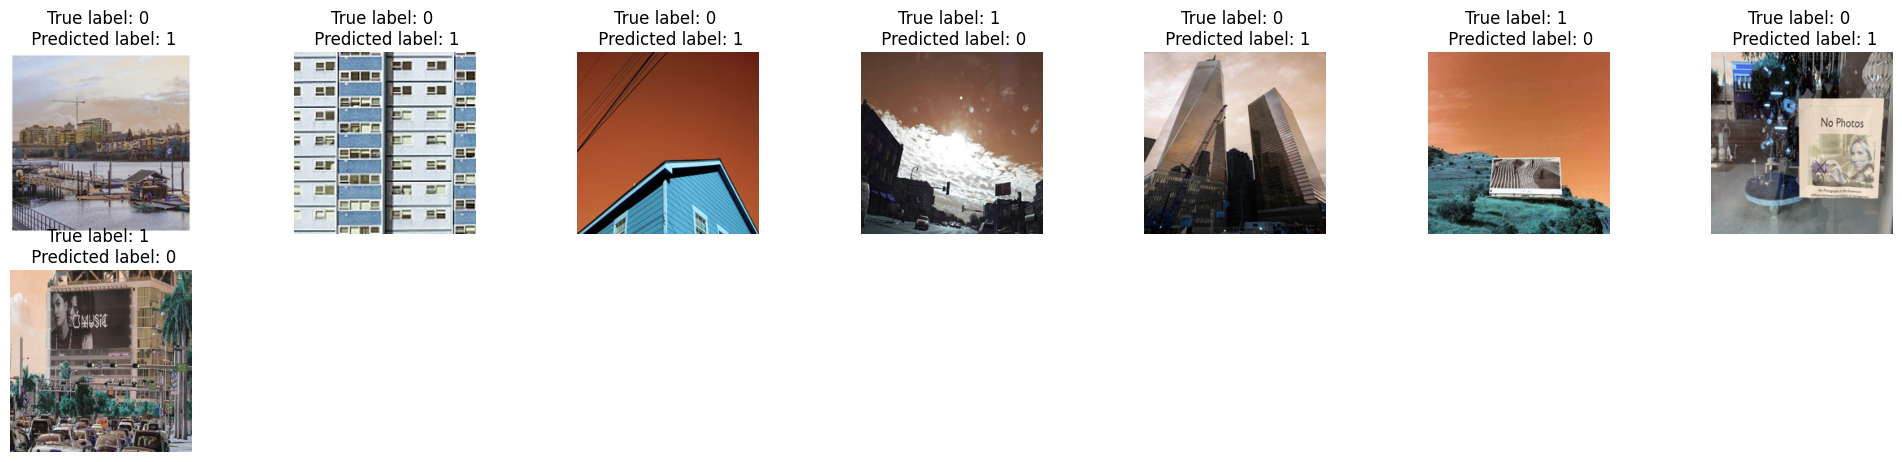

In [ ]:
# Compare y_hat to y_val
misclassified = []
label_comparison =  actual_ylabel == y_hat
misclassified = np.where(label_comparison == False)[0]  # Get the indices of misclassified images
print('misclassified indices:',misclassified)
print('no. of misclassification:', len(misclassified))
plt.figure(figsize=(25, 25))
for i, index in enumerate(misclassified):
    ax =plt.subplot(9, 7, i+1)
    plt.imshow(X_test[index])
    plt.title("True label: {} \n Predicted label: {}".format(actual_ylabel[index], y_hat[index]))
    plt.axis('off')

newdataseResnetADNET_modelkfold

In [ ]:
path = f"/python_programming/FYP_2022/Models/model/"

new_model_resnet = tf.keras.models.load_model(os.path.join(path, 'ALOS_ResnetADNET_modelkfold.h5'))

In [ ]:
predictions = new_model_resnet.predict(X_test)
actual_ylabel = y_test
#print("The prediction for this image is: ", predictions)
print("The actual label for this image is: ", actual_ylabel)

y_hat = np.argmax(predictions, axis = 1) # We take the highest probability
print('prediction label:', y_hat)

#Compare the predictions and labels and get the accuracy
accuracy = np.mean(np.equal(actual_ylabel, y_hat))
print(f"Accuracy: {accuracy:.2f}")

19/19 [==============================] - 12s 106ms/step
The actual label for this image is:  [0 0 1 1 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 0 0 1 1 0 0 1 0 0
 1 0 0 1 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 1 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 0
 1 0 0 0 0 0 0 1 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 1 0 1 0 1 0 0 1 0 0 0 1 0 1
 1 1 1 0 1 0 0 1 1 0 1 0 1 1 1 0 0 0 1 1 1 0 0 1 1 1 0 1 1 1 1 0 0 0 0 0 1
 0 0 1 1 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 1 0 1 1 1 0 1 0 0 1 0 0 1 0 0
 1 0 0 1 1 1 0 1 1 1 1 1 0 0 1 1 1 0 0 1 0 1 1 0 1 0 1 1 0 1 0 0 1 1 0 1 0
 1 0 1 0 1 0 1 1 0 0 0 0 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0
 1 1 0 1 0 0 1 1 1 1 0 1 1 0 0 1 1 0 0 0 0 1 0 1 0 0 1 1 1 1 1 1 1 0 1 0 1
 0 0 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1 1 0
 1 0 0 0 1 0 0 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 1 1 1 1
 1 1 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 1 0 0 0 1 0 1 0 1 1 0 1 0 0
 0 0 1 1 1 1 1 1 0 1 1 0 0 1 1 0 0 0 0 0 0 1 1 1 0 1 1 1 1 0 0 0 1 0 0 1 1
 1 0 0 

In [ ]:
test= 0
for i in range(len(X_test)):
   #textx_file_name = os.path.basename(X_test[i])
   #print('text x:', textx_file_name)

   #if y_hat[i] > 0.5:
  plt.figure()
  plt.imshow(X_test[i][:,:,::-1])
  plt.title("True label: {} \n Predicted label: {}".format(actual_ylabel[i], y_hat[i]))
  plt.axis('off')
  print('Predicted class belongs to billboard class')
  #image_bgr = cv2.cvtColor(X_test[i], cv2.COLOR_BGR2RGB)

    # Scale the pixel values to the range [0, 255]
  scaled_image = (X_test[i] * 255).astype('uint8')
  rgb_image = cv2.cvtColor(scaled_image, cv2.COLOR_BGR2RGB)
  resized_image = cv2.resize(rgb_image, (224, 224))

  plt.savefig('/python_programming/FYP_2022/testresult/alosdataset/resnet1/' +str(test)+ '', bbox_inches = 'tight', pad_inches = 0)
  test = test +1
  plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
_, acc = new_model_resnet.evaluate(X_test, y_test)
print("Accuracy = ", (acc * 100.0), "%")

19/19 [==============================] - 3s 82ms/step - loss: 0.0451 - accuracy: 0.9868
Accuracy =  98.67549538612366 %


misclassified indices: [ 48  57 163 251 264 472 492 589]
no. of misclassification: 8


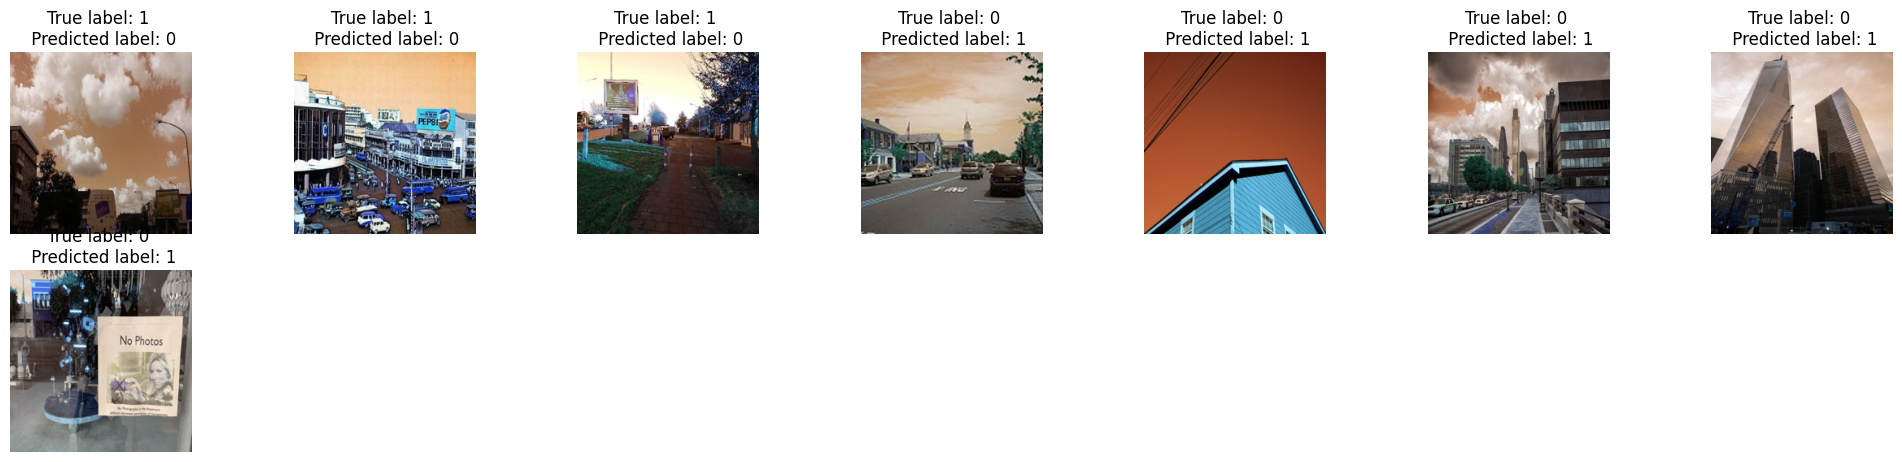

In [ ]:
# Compare y_hat to y_val
misclassified = []
label_comparison =  actual_ylabel == y_hat
misclassified = np.where(label_comparison == False)[0]  # Get the indices of misclassified images
print('misclassified indices:',misclassified)
print('no. of misclassification:', len(misclassified))
plt.figure(figsize=(25, 25))
for i, index in enumerate(misclassified):
    ax =plt.subplot(9, 7, i+1)
    plt.imshow(X_test[index])
    plt.title("True label: {} \n Predicted label: {}".format(actual_ylabel[index], y_hat[index]))
    plt.axis('off')

ALOSdatset_svm_modelkfold

In [ ]:
import pickle
# Load the model
with open('/python_programming/FYP_2022/Models/model/ALOS_svckfolds.pkl', 'rb') as f:
    svmclf_model = pickle.load(f)

In [ ]:
X_test =  X_test.reshape(X_test.shape[0], -1)
predictions = svmclf_model.predict(X_test)
actual_ylabel = y_test

#print("The prediction for this image is: ", predictions)
print("The actual label for this image is: ", actual_ylabel)

y_hat = predictions # We take the highest probability
print('prediction label:', y_hat)

#Compare the predictions and labels and get the accuracy
accuracy = np.mean(np.equal(actual_ylabel, y_hat))
print(f"Accuracy: {accuracy:.2f}")

The actual label for this image is:  [0 0 1 1 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 0 0 1 1 0 0 1 0 0
 1 0 0 1 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 1 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 0
 1 0 0 0 0 0 0 1 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 1 0 1 0 1 0 0 1 0 0 0 1 0 1
 1 1 1 0 1 0 0 1 1 0 1 0 1 1 1 0 0 0 1 1 1 0 0 1 1 1 0 1 1 1 1 0 0 0 0 0 1
 0 0 1 1 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 1 0 1 1 1 0 1 0 0 1 0 0 1 0 0
 1 0 0 1 1 1 0 1 1 1 1 1 0 0 1 1 1 0 0 1 0 1 1 0 1 0 1 1 0 1 0 0 1 1 0 1 0
 1 0 1 0 1 0 1 1 0 0 0 0 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0
 1 1 0 1 0 0 1 1 1 1 0 1 1 0 0 1 1 0 0 0 0 1 0 1 0 0 1 1 1 1 1 1 1 0 1 0 1
 0 0 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1 1 0
 1 0 0 0 1 0 0 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 1 1 1 1
 1 1 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 1 0 0 0 1 0 1 0 1 1 0 1 0 0
 0 0 1 1 1 1 1 1 0 1 1 0 0 1 1 0 0 0 0 0 0 1 1 1 0 1 1 1 1 0 0 0 1 0 0 1 1
 1 0 0 0 1 0 1 1 1 0 0 1 1 1 1 0 0 0 0 1 1 0 0 1 1 1 0 0 0 0 0 

In [ ]:
test= 0
for i in range(len(X_test)):
  X_test = X_test.reshape(-1,224 , 224, 3)
  plt.figure()
  plt.imshow(X_test[i][:,:,::-1])
  plt.title("True label: {} \n Predicted label: {}".format(actual_ylabel[i], y_hat[i]))
  plt.axis('off')
  print('Predicted class belongs to billboard class')

  plt.savefig('/python_programming/FYP_2022/testresult/alosdataset/svm/' +str(test)+ '', bbox_inches = 'tight', pad_inches = 0)
  test = test +1
  plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
misclassified = []
label_comparison =  actual_ylabel == y_hat
misclassified = np.where(label_comparison == False)[0]  # Get the indices of misclassified images
print('misclassified indices:',misclassified)
print('no of missclassification:', len(misclassified))
plt.figure(figsize=(25, 25))
for i, index in enumerate(misclassified):
    ax =plt.subplot(9, 7, i+1)
    plt.imshow(X_test[index])
    plt.title("True label: {} \n Predicted label: {}".format(actual_ylabel[index], y_hat[index]))
    plt.axis('off')

Output hidden; open in https://colab.research.google.com to view.

newdataset_rndmforest_modelkfold

In [ ]:
import pickle
# Load the model
with open('/python_programming/FYP_2022/Models/model/ALOS_randmfrstkfolds.pkl', 'rb') as f:
    randomclf_model = pickle.load(f)

In [ ]:
X_test =  X_test.reshape(X_test.shape[0], -1)
predictions = randomclf_model.predict(X_test)
actual_ylabel = y_test

#print("The prediction for this image is: ", predictions)
print("The actual label for this image is: ", actual_ylabel)

y_hat = predictions # We take the highest probability
print('prediction label:', y_hat)

#Compare the predictions and labels and get the accuracy
accuracy = np.mean(np.equal(actual_ylabel, y_hat))
print(f"Accuracy: {accuracy:.2f}")

The actual label for this image is:  [0 0 1 1 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 0 0 1 1 0 0 1 0 0
 1 0 0 1 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 1 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 0
 1 0 0 0 0 0 0 1 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 1 0 1 0 1 0 0 1 0 0 0 1 0 1
 1 1 1 0 1 0 0 1 1 0 1 0 1 1 1 0 0 0 1 1 1 0 0 1 1 1 0 1 1 1 1 0 0 0 0 0 1
 0 0 1 1 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 1 0 1 1 1 0 1 0 0 1 0 0 1 0 0
 1 0 0 1 1 1 0 1 1 1 1 1 0 0 1 1 1 0 0 1 0 1 1 0 1 0 1 1 0 1 0 0 1 1 0 1 0
 1 0 1 0 1 0 1 1 0 0 0 0 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0
 1 1 0 1 0 0 1 1 1 1 0 1 1 0 0 1 1 0 0 0 0 1 0 1 0 0 1 1 1 1 1 1 1 0 1 0 1
 0 0 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1 1 0
 1 0 0 0 1 0 0 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 1 1 1 1
 1 1 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 1 0 0 0 1 0 1 0 1 1 0 1 0 0
 0 0 1 1 1 1 1 1 0 1 1 0 0 1 1 0 0 0 0 0 0 1 1 1 0 1 1 1 1 0 0 0 1 0 0 1 1
 1 0 0 0 1 0 1 1 1 0 0 1 1 1 1 0 0 0 0 1 1 0 0 1 1 1 0 0 0 0 0 

In [ ]:
test= 0
for i in range(len(X_test)):
  X_test = X_test.reshape(-1,224 , 224, 3)


  plt.figure()
  plt.imshow(X_test[i][:,:,::-1])
  plt.title("True label: {} \n Predicted label: {}".format(actual_ylabel[i], y_hat[i]))
  plt.axis('off')
  print('Predicted class belongs to billboard class')

  plt.savefig('/python_programming/FYP_2022/testresult/alosdataset/rf/' +str(test)+ '', bbox_inches = 'tight', pad_inches = 0)
  test = test +1
  plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Compare y_hat to y_val
misclassified = []
label_comparison =  actual_ylabel == y_hat
misclassified = np.where(label_comparison == False)[0]  # Get the indices of misclassified images
print('misclassified indices:',misclassified)
print('no of missclassification:', len(misclassified))
plt.figure(figsize=(25, 25))
for i, index in enumerate(misclassified):
    ax =plt.subplot(9, 7, i+1)
    plt.imshow(X_test[index])
    plt.title("True label: {} \n Predicted label: {}".format(actual_ylabel[index], y_hat[index]))
    plt.axis('off')

Output hidden; open in https://colab.research.google.com to view.